In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from funcoes import fft_dec, zero_padding

def convolucao_circular(x, h):
    """
    Calcula a convolução circular entre dois sinais x e h.
    
    Parâmetros:
    -----------
    x : array_like
        Primeiro sinal de entrada
    h : array_like
        Segundo sinal de entrada
    
    Retorna:
    --------
    y : ndarray
        Resultado da convolução circular de tamanho N
    """
    N = max(len(x), len(h))
    
    # Aplica zero-padding
    x_padded = zero_padding(x, (N - len(x)))
    h_padded = zero_padding(h, (N - len(h)))

    x_padded = zero_padding(x)
    h_padded = zero_padding(h)

    X = fft_dec(x_padded)
    H = fft_dec(h_padded)
    Y = X * H
    
    # Calcular a IDFT e retorna a parte real
    y = ifft(Y).real
    
    return y

def convolucao_circular_direta(x, h):
    """
    Implementação direta da convolução circular
    """
    N = max(len(x), len(h))
    
    x_padded = np.pad(x, (0, N - len(x)))
    h_padded = np.pad(h, (0, N - len(h)))
    
    y = np.zeros(N)
    for n in range(N):
        for k in range(N):
            y[n] += x_padded[k] * h_padded[(n - k) % N]
    
    return y

In [42]:

# Exemplo 1: Sinais simples
print("=== Exemplo 1 ===")
x = np.array([1, 2, 3, 4])
h = np.array([1, 0, 1, 0])

# Convolução circular usando DFT
y_dft = convolucao_circular(x, h)
print("Convolução circular (DFT):", y_dft)

# Convolução circular direta (para verificação)
y_direta = convolucao_circular_direta(x, h)
print("Convolução circular (direta):", y_direta)

# Verificação
print("Erro médio:", np.mean(np.abs(y_dft - y_direta)))


=== Exemplo 1 ===
Convolução circular (DFT): [4. 6. 4. 6.]
Convolução circular (direta): [4. 6. 4. 6.]
Erro médio: 0.0


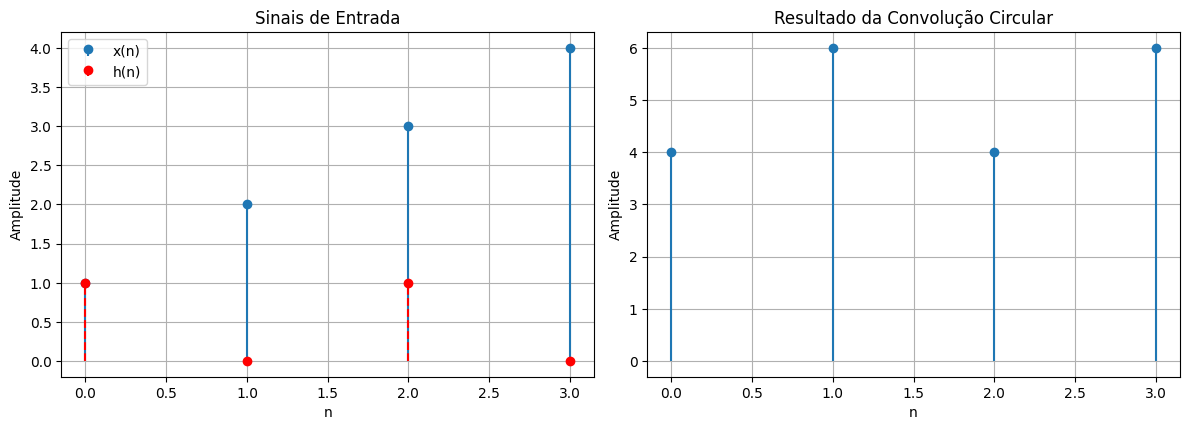

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
n = np.arange(len(x))
plt.stem(n, x, label='x(n)', basefmt=' ')
plt.stem(n, h, label='h(n)', markerfmt='ro', linefmt='r--', basefmt=' ')
plt.title("Sinais de Entrada")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
n_result = np.arange(len(y_dft))
plt.stem(n_result, y_dft, label='Convolução Circular', basefmt=' ')
plt.title("Resultado da Convolução Circular")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("\n=== Exemplo 2 ===")
x = np.array([1, 2, 3])        #  3
h = np.array([1, 1, 1, 1])     #  4

# N = 4 (padrão - maior comprimento)
y1 = convolucao_circular(x, h)
print("N=4 (padrão):", y1)

# N = 6
y2 = convolucao_circular(x, h, N=6)
print("N=6:", y2)




=== Exemplo 2 ===
N=4 (padrão): [6. 6. 6. 6.]
N=6: [6. 6. 6. 6.]


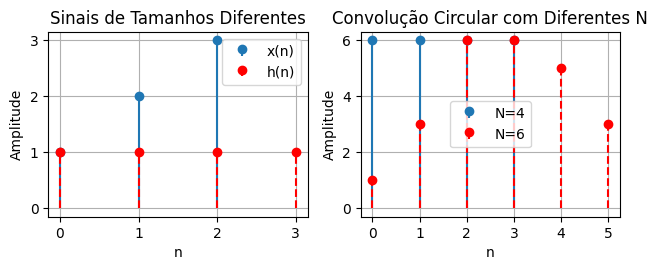

In [ ]:
plt.subplot(2, 2, 1)
n_x = np.arange(len(x))
n_h = np.arange(len(h))
plt.stem(n_x, x, label='x(n)', basefmt=' ')
plt.stem(n_h, h, label='h(n)', markerfmt='ro', linefmt='r--', basefmt=' ')
plt.title("Sinais de Tamanhos Diferentes")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
n1 = np.arange(len(y1))
n2 = np.arange(len(y2))
plt.stem(n1, y1, label='N=4', basefmt=' ')
plt.stem(n2, y2, label='N=6', markerfmt='ro', linefmt='r--', basefmt=' ')
plt.title("Convolução Circular com Diferentes N")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()